In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Frequency Domain Analysis - Resizing

Remember, we already did this using operation in the spatial domain (interpolation methods)? Now let's do the same thing using frequency domain analysis.

In [1]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-5byht8zp
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=c84e6446d2b1b1c7b67a770ae1b2d55851781fc32d15d717ac6f3b92c654f060
  Stored in directory: /tmp/pip-ephem-wheel-cache-owht7g4_/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-5byht8zp


In [2]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=1) # download data for this assignment

Download Complete!


In [3]:
def resize_ft(img, k=1):
    '''
    Write a program to resize the given image by a factor 'k' using frequency domain analysis.
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
        - use int(k*input_image_size) to find the nearest integer
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
              - range should be between (0, 255) which may not be the case when u run the inverse DFT. 
              - Therefore, normalise the image by img = (img - min(img))/max(img) to rescale the values to (0, 255)
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hints:
    + For upscaling - pad the frquency domain signal with zeros around the center of the image. 
    + For downscaling - crop the frequency domain signal at the centre of required size.
    + PS - Make sure to use proper shift operation on output of cv2.dft so that your frequency domain signal 
         - assumes the centre of the image to be origin
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    ft = cv2.dft(img.astype(np.float32), flags = cv2.DFT_COMPLEX_OUTPUT)
    centered_ft = np.fft.fftshift(ft)

    m, n = img.shape
    new_m = int(k*img.shape[0])
    new_n = int(k*img.shape[1])
    new_ft = np.zeros((new_m, new_n, 2))

    if k >= 1:
        new_ft[new_m//2 - m//2:new_m//2 + (m - m//2), new_n//2 - n//2:new_n//2 + (n - n//2)] = centered_ft
    elif k < 1:
        new_ft = centered_ft[m//2 - new_m//2:m//2 + (new_m - new_m//2), n//2 - new_n//2:n//2 + (new_n - new_n//2)] 

    uncentered = np.fft.ifftshift(new_ft)
    image = cv2.idft(uncentered)
    mag_img = np.sqrt(image[:, :, 0]**2 + image[:, :, 1]**2)
    norm_img = (mag_img - np.min(mag_img))/(np.max(mag_img))*255

    out_img = norm_img.astype(np.uint8)
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Observations

Original


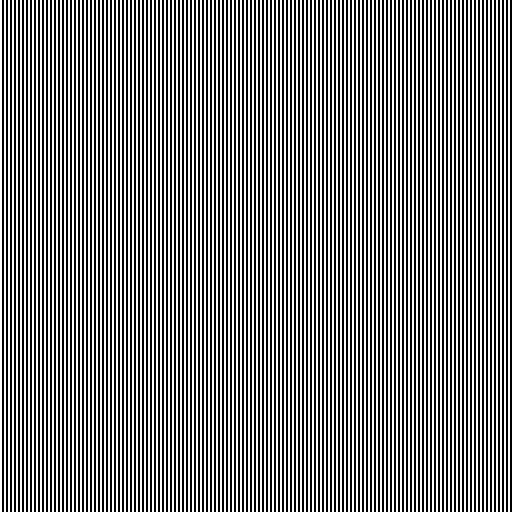

 k = 0.49


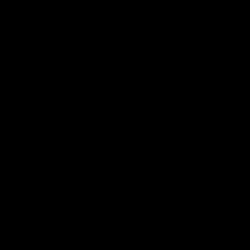

 k = 0.5


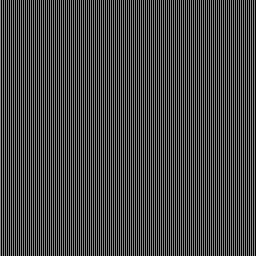

 k = 0.51


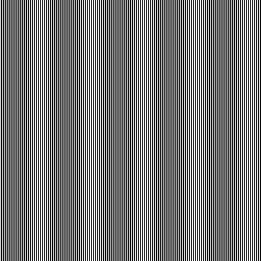

 k = 1.96


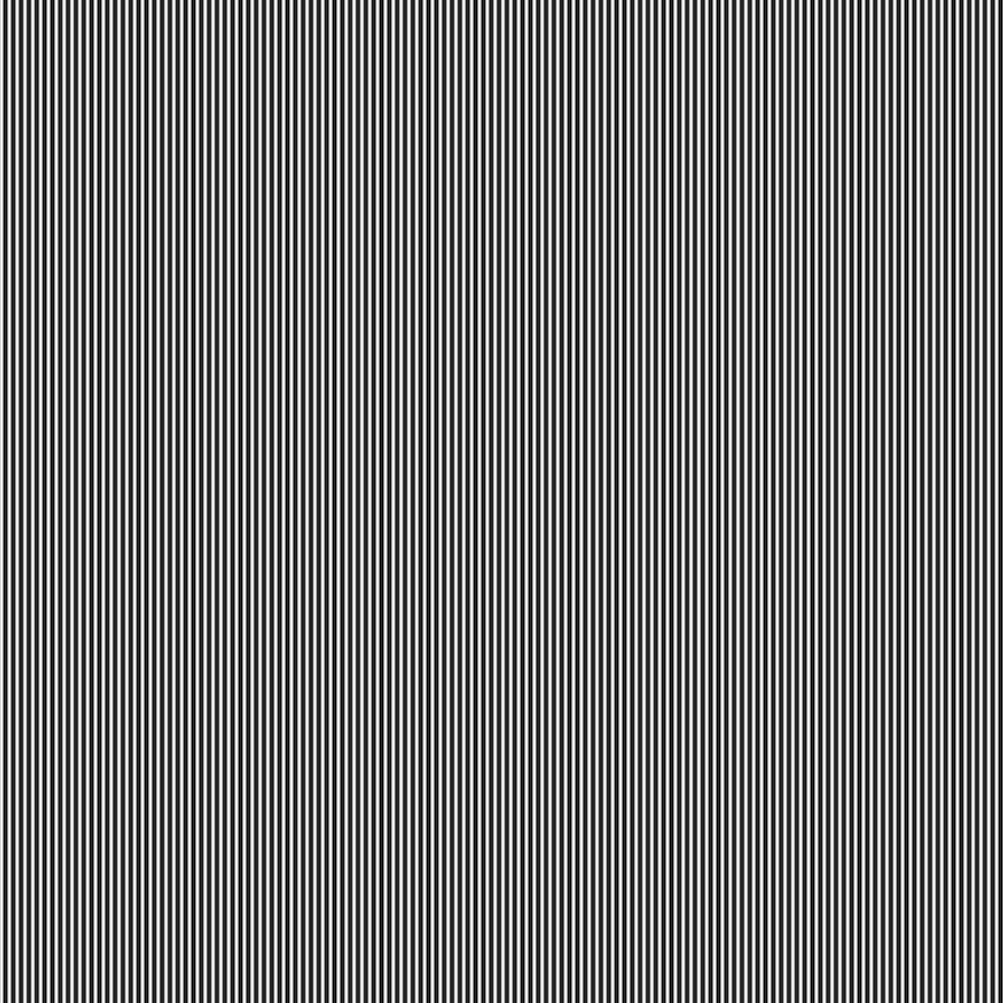

 k = 2


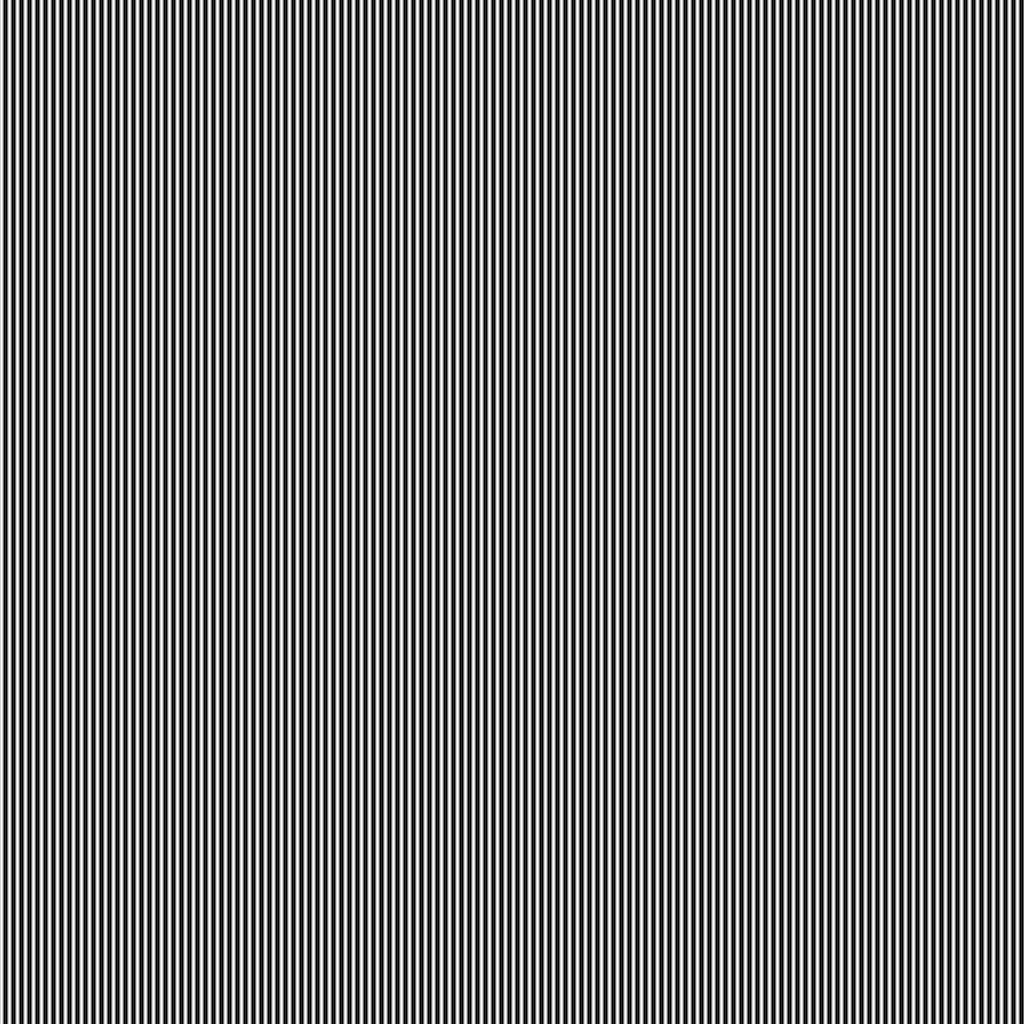

 k = 2.04


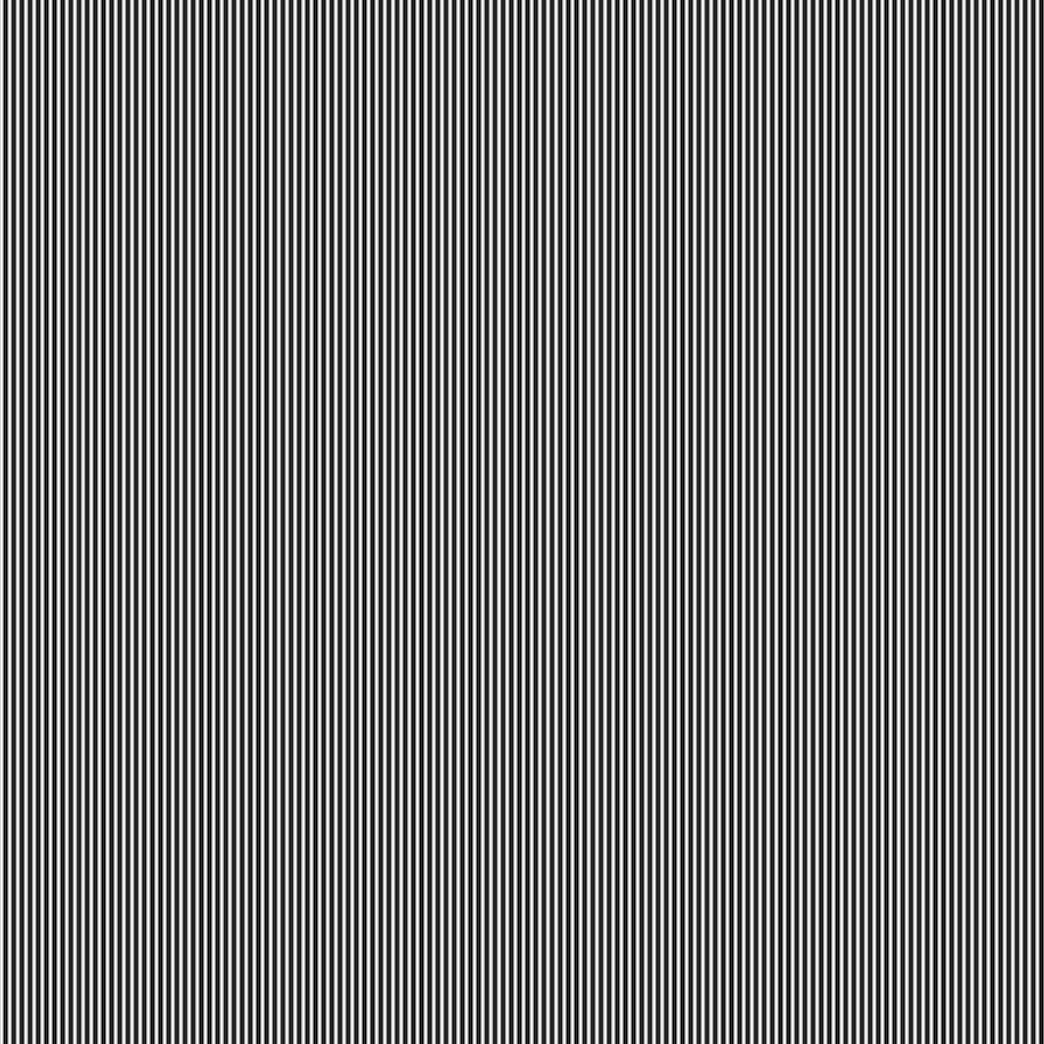

In [4]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the output for different values of k

data = cv2.imread("data/parallel_lines.jpg", 0)

print("Original")
cv2_imshow(data)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    print(" k = " + str(k))
    cv2_imshow(tmp)

In [5]:
your_observation = """
k = 0.49: The image is black - the stripes are too close together considering the pixel resolution
k = 0.5: We can barely see very thin bands of black/white stripes
k = 0.51: There is an alternating pattern of dark and light areas
k = 1.96, 2, 2.04: Black and white stripes are quite clearly visible here
"""

print(your_observation)


k = 0.49: The image is black - the stripes are too close together considering the pixel resolution
k = 0.5: We can barely see very thin bands of black/white stripes
k = 0.51: There is an alternating pattern of dark and light areas
k = 1.96, 2, 2.04: Black and white stripes are quite clearly visible here



In [6]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
data = cv2.imread("data/parallel_lines.jpg", 0)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    gen_imgs.append(tmp)

task1_submission = np.array(gen_imgs)